In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
!pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 19.2 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip


# Chap1

In [12]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [9]:
# Create a Normal Gaussian.
mu = 0.0
sigma = 1.0
X = stats.norm(mu, sigma)
#
x = X.rvs(3)
print(x)

[ 0.75085979  1.19749496 -0.15864218]


Text(0, 0.5, 'p(x)')

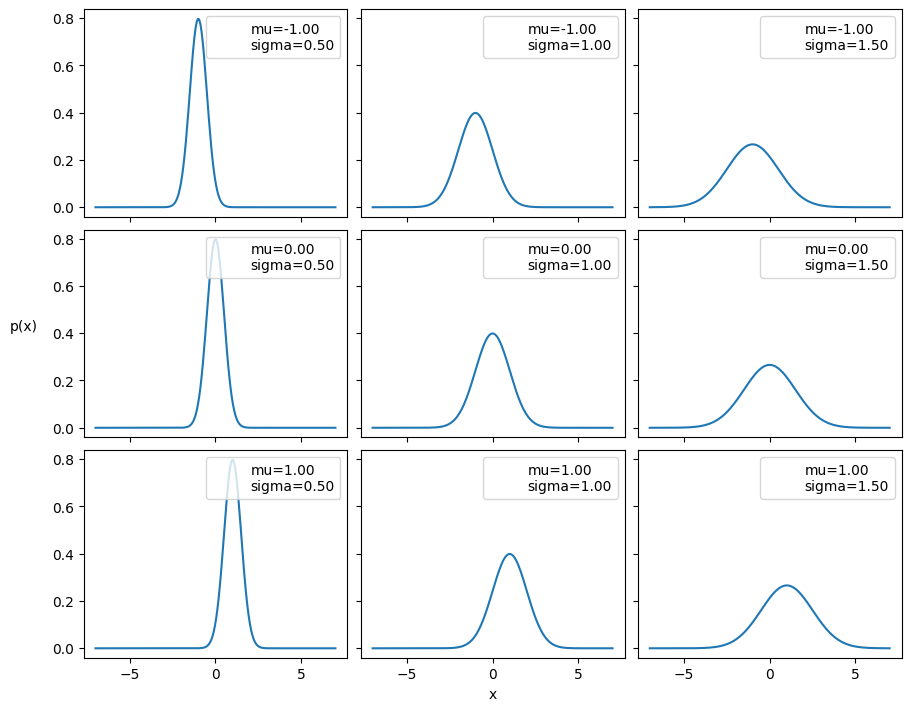

In [22]:
mu_params = [-1, 0, 1]
sd_params = [0.5, 1, 1.5]
x = np.linspace(-7, 7, 200)
# Create a 3x3 plot.
_, ax = plt.subplots(len(mu_params),
                     len(sd_params),
                     sharex=True,
                     sharey=True,
                     figsize=(9, 7),
                     # Fit plots into the figure cleanly.
                     constrained_layout=True)
                     #constrained_layout=False)
for i in range(3):
    for j in range(3):
        mu = mu_params[i]
        sd = sd_params[j]
        # Evaluate the PDF in several points.
        y = stats.norm(mu, sd).pdf(x)
        # Plot the PDF.
        ax[i, j].plot(x, y)
        # Add the legend.
        ax[i, j].plot([], label="mu={:3.2f}\nsigma={:3.2f}".format(mu, sd), alpha=0)
        ax[i, j].legend(loc=1)
ax[2, 1].set_xlabel('x')
ax[1, 0].set_ylabel('p(x)', rotation=0, labelpad=20)
#ax[1, 0].set_yticks([])

# Chap 2

In [26]:
np.random.seed(123)
trials = 4
# Unknown value.
theta_real = 0.35

data = stats.bernoulli.rvs(p=theta_real, size=trials)
print(data)

[1 0 0 0]


In [27]:
!pip install pymc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 450.0/450.0 kB 5.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 16.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.0 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.3/994.3 kB 20.3 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 21.1 MB/s eta 0:00:0000:0100:01
  Created wheel for cons: filename=cons-0.4.5-py3-none-any.whl size=9118 sha256=a27b1d0440d9e2d3e826fa5ff28b17b1703e063db2d106839bb9b66ac4e80b00
  S

In [28]:
import pymc as pm

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
<jemalloc>: MADV_DONTNEED does not work (memset will be used instead)
<jemalloc>: (This is the expected behaviour if you are running under QEMU)


In [29]:
with pm.Model() as model:
    # Prior.
    theta = pm.Beta("Theta", alpha=1.0, beta=1.0)
    # Likelihood.
    y = pm.Bernoulli('y', p=theta, observed=data)
    trace = pm.sample(1000, random_seed=123)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Theta]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 5 seconds.


ContextualVersionConflict: (setuptools 59.6.0 (/usr/lib/python3/dist-packages), Requirement.parse('setuptools>=60.0.0'), {'arviz'})